In [79]:
# normal module imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
matplotlib.style.use('ggplot')

print "Environment variable check ~ 'DFDATA': ", os.environ['DFDATA']

Populating the interactive namespace from numpy and matplotlib
Environment variable check ~ 'DFDATA':  /gws/open/NYCOpenData/nycopendata/data


#### Environment variable works!

In [80]:
# read in a csv file form CUSP datahub (and use our environment variable to do so)
# attempt to parse the data column as we import into pandas
df = pd.read_csv(os.environ['DFDATA'] + '/5uug-f49n/1394814041/5uug-f49n', parse_dates=['Date'])

# how many records are there?
len(df)

1938

In [81]:
# check the column data types
df.dtypes

Site                                     object
Date                             datetime64[ns]
DO (mg/L) Top                            object
DO (mg/L) Bot                            object
Fecal Coliform (#/100 mL) Top            object
Fecal Coliform (#/100 mL) Bot            object
Enterococcus (#/100 mL) Top              object
Enterococcus (#/100 mL) Bot              object
Transparency (Secchi) ft.                object
dtype: object

In [82]:
# what is the range of dates in the dataset?
print df.Date.min()
print df.Date.max()

2012-01-05 00:00:00
2013-01-10 00:00:00


In [83]:
# render a table of the first few rows of data
df.head()

,Site,Date,DO (mg/L) Top,DO (mg/L) Bot,Fecal Coliform (#/100 mL) Top,Fecal Coliform (#/100 mL) Bot,Enterococcus (#/100 mL) Top,Enterococcus (#/100 mL) Bot,Transparency (Secchi) ft.
0,CIC2,2013-01-10,6.31,6.44,34000,NS,1500,NS,NS
1,GC3,2013-01-10,6.12,7.07,116,96,180,236,NS
2,GC4,2013-01-10,6.80,7.76,104,84,234,112,NS
3,GC5,2013-01-10,7.26,8.06,92,88,104,52,NS
4,GC6,2013-01-10,7.59,9.36,65,31,12,24,NS


There seem to be some NaN values (recorded as 'NS' in this dataset) - can we get a sense of how many there are in a column compared to other values?

In [84]:
#df['Transparency (Secchi) ft.'].groupby(df['Transparency (Secchi) ft.']).count()
df['Fecal Coliform (#/100 mL) Top'].groupby(df['Fecal Coliform (#/100 mL) Top']).count()

Fecal Coliform (#/100 mL) Top
1         36
10        22
100        6
1000       5
102        4
102000     1
103        1
104       11
10400      1
105        2
1050       1
106        1
108        9
109        3
1090       1
11        19
110        1
1100       4
112        4
113        1
114        1
1140       1
115        3
116        8
1160       3
118        4
1190       1
12        14
120        5
1200       3
          ..
870        1
8700       1
88         7
880        1
89         1
8900       2
9         28
90         3
900        2
92        10
93         1
930        1
9300       3
93000      1
94         5
940        1
95         1
950        2
96        10
960        2
97         3
970        1
98         3
980        2
9800       2
98000      3
99         3
990        1
9900       1
NS        78
Name: Fecal Coliform (#/100 mL) Top, dtype: int64

In [86]:
# drop all columns except for two numerical columns and out datetime column
df.drop(['Site', 'DO (mg/L) Top', 'DO (mg/L) Bot',
         'Fecal Coliform (#/100 mL) Bot', 'Enterococcus (#/100 mL) Top',
        'Enterococcus (#/100 mL) Bot'], axis=1, inplace=True)

In [87]:
# now replace those 'NS' values with the preffered numpy/pandas NaN
df.replace('NS', np.nan, inplace=True)

In [88]:
# show first few rows of the trimmed dataset
df.head()

,Date,Fecal Coliform (#/100 mL) Top,Transparency (Secchi) ft.
0,2013-01-10,34000,NaN
1,2013-01-10,116,NaN
2,2013-01-10,104,NaN
3,2013-01-10,92,NaN
4,2013-01-10,65,NaN


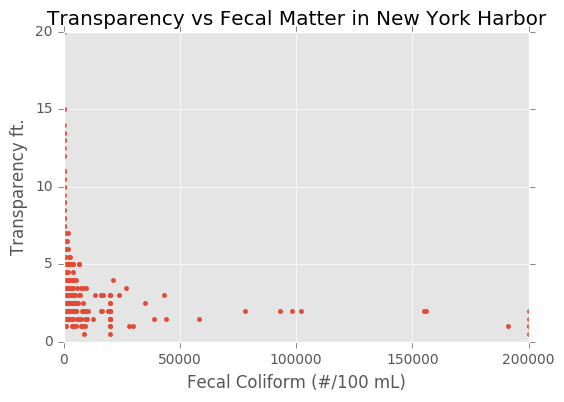

In [89]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(df['Fecal Coliform (#/100 mL) Top'], df['Transparency (Secchi) ft.'], '.')
ax1.set_ylabel('Transparency ft.')
ax1.set_xlabel('Fecal Coliform (#/100 mL)')
ax1.set_title('Transparency vs Fecal Matter in New York Harbor')
plt.show()

##### FIGURE 1: Transparency vs Fecal Matter in New York Harbor

## Extra Credit Section
I've already brought a datetime column into the dataframe and parsed it. Now recreate the scatter plot, replacing a numerical value for a date on the x-axis.

Also, note that we rotate the x-axis labels to ensure readability.

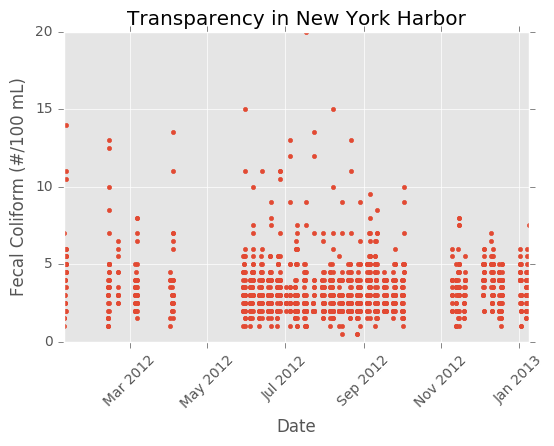

In [91]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(df['Date'], df['Transparency (Secchi) ft.'], '.')
ax2.set_xlabel('Date')
ax2.set_ylabel('Fecal Coliform (#/100 mL)')
ax2.set_title('Transparency in New York Harbor')
plt.setp(ax2.get_xticklabels(), rotation=45)
plt.show()